# Seaborn

Es un modulo de ploteo de graficos estadisticos que esta construida sobre matplotlib.

Lo interesante de este modulo es que, ademas de mostrar graficos estadisticos interesantes con muy poco codigo, es que funciona muy bien con dataframes de pandas.

[repositorio del codigo](https://github.com/mwaskom/seaborn)

[documentacion de seaborn](https://seaborn.pydata.org/)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('darkgrid')

#### Datasets

In [ ]:
# seaborn viene con un conjunto de dataframes para cargar y explorar

#['anscombe','attention','brain_networks','car_crashes','dots','exercise','flights',
# 'fmri','gammas','iris','planets','tips','titanic']

In [ ]:
df = sns.load_dataset('tips')

In [ ]:
df.head()

In [ ]:
df.shape

## Tipos de datos

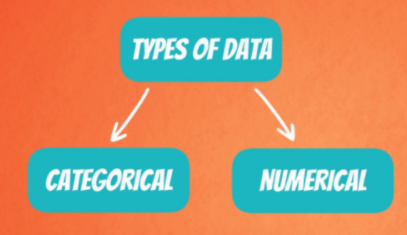

----

## Ploteos de distribucion

Utilizan variables numericas y muestran la distribucion de las mismas

### distplot
Nos muestra la distribucion de una variable numerica a traves de un histograma

In [ ]:
sns.distplot(df['total_bill'])
#kde = kernel density estimation

In [ ]:
sns.distplot(df['total_bill'],kde=False)

In [ ]:
# podemos cambiar la cantidad de bins para mas informacion
sns.distplot(df['total_bill'],kde=False,bins=30)

In [ ]:
sns.distplot(df['total_bill'],kde=False,bins=100)

### jointplot
Nos muestra un grafico bivariable (entre dos variables numericas) y ademas un grafico distplot de cada una.

Podemos elegir el tipo de grafico entre ellas:

* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”


In [ ]:
sns.jointplot(x='total_bill',y='tip',data=df)

In [ ]:
#plt.figure(figsize=(15,15))
sns.scatterplot(x='total_bill',y='tip',data=df)

In [ ]:
# que pasa si no quiero el scatter plot y quiero otro
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')

### pairplot
Nos permite graficar las relaciones bivariables a traves de todas las variables **numericas** del dataframe y ademas soporta el parametro **hue** para las columnas categoricas.

In [ ]:
sns.pairplot(df)

In [ ]:
sns.pairplot(df,hue='sex')

In [ ]:
sns.pairplot(df,hue='sex',diag_kind='hist')

In [ ]:
sns.pairplot(df,hue='sex',diag_kind='hist',palette='magma')

**histplot**

In [ ]:
sns.histplot(x='total_bill',data=df,hue='sex')

In [ ]:
sns.histplot(x='total_bill',data=df,hue='sex',multiple="stack")

In [ ]:
sns.histplot(x='total_bill',data=df,hue='sex',multiple="dodge")

In [ ]:
# y si queremos poner uno al lado del otro?
# ahora lo vemos en grids

----

## Ploteos categoricos

Ploteos para trabajar con variables categoricas

### barplot
Nos permite graficar variables categoricas, usando una funcion de agregacion sobre otra variable (generalmente numerica), por defecto esta funcion de agregacion es la media.

In [ ]:
sns.barplot(data=df,x='sex',y='total_bill')

In [ ]:
sns.barplot(data=df,y='sex',x='total_bill')

In [ ]:
import numpy as np

In [ ]:
sns.barplot(data=df,x='sex',y='total_bill',estimator=np.sum)

### countplot
Es basicamente un grafico **barplot** pero que usa como funcion de agregacion la cuenta de la cantidad de datos que tenemos en esa variable.



In [ ]:
sns.countplot(data=df,x='sex')

In [ ]:
sns.countplot(data=df,x='sex',hue="smoker")

In [ ]:
# ver de resolver ese tema

In [ ]:
df_2 = df.groupby(['sex','smoker']).count()['size']

In [ ]:
sum(df_2)

In [ ]:
df_2.map(lambda x : (x/sum(df_2))*100)

### boxplot

El diagrama de caja es un gráfico utilizado para representar una variable cuantitativa (variable numérica). El gráfico es una herramienta que permite visualizar, a través de los cuartiles, cómo es la distribución, su grado de asimetría, los valores extremos, la posición de la mediana, etc

Podemos extender la definicion para ver la distribucion de las variables categoricas (cualitativas)

In [ ]:
sns.boxplot(x='total_bill',data=df)

In [ ]:
sns.boxplot(x='total_bill',y='smoker',data=df)

In [ ]:
sns.boxplot(x='total_bill',y='day',data=df)

In [ ]:
sns.boxplot(y='total_bill',x='day',data=df,hue='smoker')

### stripplot

Este grafico consiste en un scatterplot (grafico de puntos) pero en donde una de las variables es categorica

In [ ]:
sns.stripplot(x="day", y="total_bill", data=df)

In [ ]:
sns.stripplot(x="day", y="total_bill", data=df,jitter=False)

In [ ]:
sns.stripplot(x="day", y="total_bill", data=df,hue='sex')

### catplot

Es la forma generalizada de construir un grafico categorico. Hay que pasarle que tipo de grafico queremos en el parametro `kind`.

Veamos unos ejemplos

In [ ]:
sns.catplot(x='sex',data=df,kind='count')

In [ ]:
sns.catplot(x='sex',y='total_bill',data=df,kind='box')

----

## Ploteos matriciales

Nos permite hacer graficos matriciales, es decir, mostrar una matriz en un mapa de colores dependiendo de los valores de la misma.

### Heatmap

Para que este grafico funcione correctamente, los datos ya tienen que estar en formato de matriz numerica, y la funcion sns.heatmap() basicamente la colorea.

In [ ]:
# creamos una matriz de correlacion
# que nos va a indicar la correlacion entre las distintas variables numericas

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr())

In [ ]:
sns.heatmap(df.corr(),cmap='PuOr')

In [ ]:
sns.heatmap(df.corr(),cmap='ocean',annot=True)

In [ ]:
# si vamos bien de tiempo no dar este tema, porque no vimos pivot tables

In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
flights.head()

In [ ]:
flights.pivot_table(values='passengers',index='month',columns='year')

In [ ]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

## Cuadriculas - Grillas

Permiten hacer varios graficos a la vez en distintas grillas

### PairGrid

Crea una grilla para rellenar con graficos bivariables del dataset, para variables numericas.


In [ ]:
sns.PairGrid(df)

In [ ]:
# una vez creada la girlla podemos mapear graficos sobre la misma

g = sns.PairGrid(df)
g.map(plt.scatter)

In [ ]:
g = sns.PairGrid(df,hue='sex')
g.map(plt.scatter)

In [ ]:
# Puedo mapear las distintas regiones de la grilla
g = sns.PairGrid(df,palette='coolwarm')
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

### Facet Grid

Es una forma general de crear grillas para graficos basados en un campo en particular, con relacion a otros.

In [ ]:
g = sns.FacetGrid(df, col="time", row="smoker")

In [ ]:
g = sns.FacetGrid(df, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

In [ ]:
g = sns.FacetGrid(df, col="time",  row="smoker",hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

**volvamos a nuestro ejemplo de histogramas**

In [ ]:
sns.histplot(x='total_bill',data=df,hue='sex')

In [ ]:
sns.FacetGrid(data=df,col="sex")

In [ ]:
g = sns.FacetGrid(data=df,col="sex")
g.map(sns.histplot,'total_bill')

In [ ]:
g = sns.FacetGrid(data=df,col="sex",hue='sex')
g.map(sns.histplot,'total_bill')

## Estilos y colores

Veamos un poco mas de seaborn para personalizar nuestros graficos

In [ ]:
sns.countplot(x='sex',data=df)

In [ ]:
# cambiar el estilo de los graficos
sns.set_style('ticks')
# {darkgrid, whitegrid, dark, white, ticks}
sns.countplot(x='sex',data=df)

In [ ]:
sns.countplot(x='sex',data=df)
sns.despine()

In [ ]:
sns.countplot(x='sex',data=df)
sns.despine(left=True,bottom=True)

In [ ]:
# cambiar el tamano de la imagen
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.countplot(x='sex',data=df)

In [ ]:
# palettes and colors
sns.countplot(x='sex',data=df,hue="size")

In [ ]:
sns.countplot(x='sex',data=df,hue="size",palette='seismic')

https://matplotlib.org/tutorials/colors/colormaps.html